In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random
%matplotlib inline
import re
import warnings

In [96]:
#Notes/idead/thoughts

# success rate of gpu's
# what does job termination mean - lose work? means that calculating time is important
#requested jobs used time and terminated -why a buffer
#......................................................
#failures by user - who and not completeing - using a lot of resources 
#failed jobs - bad users or hardware failure (exitcode)
#envoriment side  -- first value user - exitcode, second environment 

#'0:9 and 0:15 are the most common exit codes for jobs with some version of the state of "CANCELLED"

#asking for enough memory/types of failures
#asking too much memory

In [97]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [98]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')
#accre

In [99]:
accre = pd.DataFrame(accre)
#accre

In [100]:
accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','')
#accre

In [101]:
accre['REQTIME'] = accre['REQTIME'].astype(str)
accre['USEDTIME'] = accre['USEDTIME'].astype(str)
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'].str.replace('-',' days '))
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'].str.replace('-',' days '))
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME']).dt.total_seconds()
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME']).dt.total_seconds()
accre = accre[accre['USEDMEM'].map(len) > 1]
#accre

In [102]:
accre_glasshouse = accre[accre['ACCOUNT'] == 'glasshouse']
accre_virginia = accre[accre['ACCOUNT'] == 'virginia']
accre_malanga = accre[accre['ACCOUNT'] == 'malanga']
accre_prince = accre[accre['ACCOUNT'] == 'prince']
accre_prince = accre[accre['ACCOUNT'] == 'prince']
accre_grisette = accre[accre['ACCOUNT'] == 'grisette']
accre_harovin = accre[accre['ACCOUNT'] == 'harovin']
accre_antares = accre[accre['ACCOUNT'] == 'antares']
accre_sunburst = accre[accre['ACCOUNT'] == 'sunburst']
accre_pasilla = accre[accre['ACCOUNT'] == 'pasilla']
accre_plumcot = accre[accre['ACCOUNT'] == 'plumcot']
accre_pecans = accre[accre['ACCOUNT'] == 'pecans']
accre_kinnow = accre[accre['ACCOUNT'] == 'kinnow']
accre_bertanne = accre[accre['ACCOUNT'] == 'bertanne']
accre_almonds = accre[accre['ACCOUNT'] == 'almonds']
accre_apple = accre[accre['ACCOUNT'] == 'apple']
accre_cactus = accre[accre['ACCOUNT'] == 'cactus']

In [103]:
accre_glasshouse_failed_count = accre_glasshouse[accre_glasshouse['STATE'] == 'FAILED']
#accre_glasshouse_failed_count.info()
accre_glasshouse_fail_pct = 250/234998


In [104]:
accre_virginia_failed_count = accre_virginia[accre_virginia['STATE'] == 'FAILED']
#accre_virginia_failed_count.info()
accre_virginia_fail_pct = 0/9488

In [105]:
accre_malanga_failed_count = accre_malanga[accre_malanga['STATE'] == 'FAILED']
#accre_malanga_failed_count.info()
accre_malanga_fail_pct = 0/8157

In [106]:
accre_prince_failed_count = accre_prince[accre_prince['STATE'] == 'FAILED']
#accre_prince_failed_count
accre_prince_fail_pct = 0/7174

In [107]:
accre_malanga_failed_count = accre_malanga[accre_malanga['STATE'] == 'FAILED']
#accre_malanga_failed_count.info()
accre_malanga_fail_pct = 0/8157

In [108]:
accre_grisette_failed_count = accre_grisette[accre_grisette['STATE'] == 'FAILED']
#accre_grisette_failed_count.info()
accre_grisette_fail_pct = 1/5242

In [109]:
accre_harovin_failed_count = accre_harovin[accre_harovin['STATE'] == 'FAILED']
#accre_harovin_failed_count.info()
accre_harovin_fail_pct = 4/4534

In [110]:
accre_antares_failed_count = accre_antares[accre_antares['STATE'] == 'FAILED']
#accre_antares_failed_count.info()
accre_antares_fail_pct = 0/3015

In [111]:
accre_sunburst_failed_count = accre_sunburst[accre_sunburst['STATE'] == 'FAILED']
#accre_sunburst_failed_count.info()
accre_sunburst_fail_pct = 87/1505

In [112]:
accre_pasilla_failed_count = accre_pasilla[accre_pasilla['STATE'] == 'FAILED']
#accre_pasilla_failed_count.info()
accre_pasilla_fail_pct = 1/1263

In [113]:
accre_plumcot_failed_count = accre_plumcot[accre_plumcot['STATE'] == 'FAILED']
#accre_plumcot_failed_count.info()
accre_plumcot_fail_pct = 0/790

In [114]:
accre_pecans_failed_count = accre_pecans[accre_pecans['STATE'] == 'FAILED']
#accre_pecans_failed_count.info()
accre_pecans_fail_pct = 0/576

In [115]:
accre_kinnow_failed_count = accre_kinnow[accre_kinnow['STATE'] == 'FAILED']
#accre_kinnow_failed_count.info()
accre_kinnow_fail_pct = 0/406

In [116]:
accre_bertanne_failed_count = accre_bertanne[accre_bertanne['STATE'] == 'FAILED']
#accre_bertanne_failed_count.info()
accre_bertanne_fail_pct = 1/198

In [117]:
accre_almonds_failed_count = accre_almonds[accre_almonds['STATE'] == 'FAILED']
#accre_almonds_failed_count.info()
accre_almonds_fail_pct = 6/197

In [118]:
accre_apple_failed_count = accre_apple[accre_apple['STATE'] == 'FAILED']
#accre_apple_failed_count.info()
accre_apple_fail_pct = 11/186

In [119]:
accre_cactus_failed_count = accre_cactus[accre_cactus['STATE'] == 'FAILED']
#accre_cactus_failed_count.info()
accre_cactus_fail_pct = 0/113

In [121]:
accre_account_fail_pct = pd.DataFrame({'ACCOUNT': ['glasshouse', 'virginia', 'malanga',
              'prince', 'grisette', 'harovin',
              'sunburst', 'pasilla', 'plumcot',
              'pecans', 'kinnow', 'bertanne',
              'almonds', 'apple', 'cactus'],
              
              'PERCENT_FAIL': [accre_glasshouse_fail_pct, accre_virginia_fail_pct, accre_malanga_fail_pct,
               accre_prince_fail_pct, accre_grisette_fail_pct, accre_harovin_fail_pct,
               accre_sunburst_fail_pct, accre_pasilla_fail_pct, accre_plumcot_fail_pct,
               accre_pecans_fail_pct, accre_kinnow_fail_pct, accre_bertanne_fail_pct,
               accre_almonds_fail_pct, accre_apple_fail_pct, accre_cactus_fail_pct]})

In [94]:
accre_account_fail_pct                            #This is the fail percent for all jobs for Accounts with over 100 jobs#

,ACCOUNT,PERCENT_FAIL
0,glasshouse,0.001064
1,virginia,0.000000
2,malanga,0.000000
3,prince,0.000000
4,grisette,0.000191
5,harovin,0.000882
6,sunburst,0.057807
7,pasilla,0.000792
8,plumcot,0.000000
9,pecans,0.000000


<AxesSubplot:>

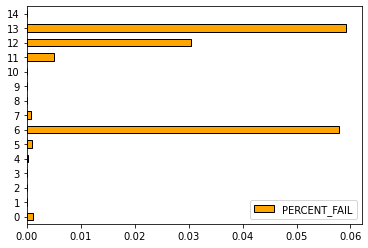

In [147]:
accre_account_fail_pct.plot(kind = 'barh', color = 'orange', edgecolor = 'black') 

In [ ]:
#Looking at Accounts Failed rate and who's fault#/distribution/Users from accounts-is there a individual who is failing/
#By what percent are they off/Do users get better with jobs-corr?

In [ ]:
#This makes a horizontal dataframe#

In [120]:
accre_account_fail_pct = pd.DataFrame([[ accre_glasshouse_fail_pct, accre_virginia_fail_pct, accre_malanga_fail_pct,
               accre_prince_fail_pct, accre_grisette_fail_pct, accre_harovin_fail_pct,
               accre_sunburst_fail_pct, accre_pasilla_fail_pct, accre_plumcot_fail_pct,
               accre_pecans_fail_pct, accre_kinnow_fail_pct, accre_bertanne_fail_pct,
               accre_almonds_fail_pct, accre_apple_fail_pct, accre_cactus_fail_pct]],
             
    columns = ['glasshouse', 'virginia', 'malanga',
              'prince', 'grisette', 'harovin',
              'sunburst', 'pasilla', 'plumcot',
              'pecans', 'kinnow', 'bertanne',
              'almonds', 'apple', 'cactus'])

In [ ]:
# .squeeze() converts df to series
#accre_list = pd.DataFrame(accre, columns=['USEDMEM'])
#accre_list = accre_list.squeeze()
